<a href="https://colab.research.google.com/github/jutourru/portfolio/blob/main/Desafio03_womarkercode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #[CHALLENGE] Estimando o Preço do Imóvel


Suponha que você trabalha em uma empresa do setor imobiliário. Após explorar as
principais variáveis que impactam o preco dos imóveis,na semana passada, pediram
para você, do time de dados, construir um modelo que estime o preço de um imóvel. <br>

Para isso, você utilizará a mesma base de dados da semana anterior
(desafio_01_preco_imoveis.csv). 


As variáveis são: 
● id : código identificador do imóvel <br>
● date: data em que o imóvel foi cadastrado<br>
● price: preço do imóvel<br>
● bedrooms: número de quartos<br>
● bathrooms: número de banheiros<br>
● sqft_living: tamanho do imóvel (dentro da casa)<br>
● sqft_lot: tamanho do lote / terreno<br>
● floors: andares<br>
● waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso contrário. <br>
● view: indica o número de quartos com vista.<br>
● condition: condição do imóvel, escala de 1 a 5<br>
● grade: nota do imóvel<br>
● sqft_above: tamanho da casa acima do solo (excluindo porão)<br>
● sqft_basement: tamanho do porão<br>
● yr_built: ano em que a casa foi construída<br>
● yr_renovated: ano em que a casa foi renovada<br>
● zipcode: "CEP" do imóvel<br> 
● lat: latitude do imóvel<br>
● long: longitude do imóvel<br>


Depois fazer as seguintes tarefas:

1 - Selecione as principais variáveis que você gostaria de incluir no modelo de precificação do imóvel.</br>

2 - Construa um modelo de regressão linear multivariada para estimar o preço do imóvel. Lembre-se de: Analisar a tabela de regressão e os resíduos do modelo e interprete os resultados. </br>

3 - Suponha agora que você encontrou um modelo ideal. Explique como você faria para colocar esse modelo em produção? Entenda por modelo em produção um modelo que a cada apartamento novo inserido na base precifique-o com base no seu modelo. </br>

In [ ]:
#bibliotecas usadas no projeto

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import skewnorm 
## Gerar distribuicoes assimétricas
from pandas_profiling import ProfileReport
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
## Modelo Random Forest
from sklearn.ensemble import RandomForestRegressor as rf
## RFE
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline


In [ ]:
desafio03_df = pd.read_csv ('/content/desafio_01_preco_imoveis.csv')
desafio03_df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069


In [ ]:
desafio03_df.shape

(21613, 19)

In [ ]:
desafio03_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


In [ ]:
desafio03_df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long'],
      dtype='object')

In [ ]:
desafio03_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
desafio03_df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64


Variáveis escolhidas são:

1) price: preço do imóvel <br>
2) bedrooms: número de quartos <br>
3) bathrooms: número de banheiros <br>
4) sqft_living: tamanho do imóvel (dentro da casa)<br>
5) sqft_lot: tamanho do lote / terreno <br>
6) waterfront: flag se o imóvel tem vista para o mar. 1 caso positivo, 0 caso contrário.<br>
7) condition: condição do imóvel, escala de 1 a 5<br>
8) yr_renovated: ano em que a casa foi renovada<br>
9) zipcode: "CEP" do imóvel<br>



# Separando o dataset em treino e em teste (80/20)

In [ ]:
X = desafio03_df.drop(columns = ['price'])
y = desafio03_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [ ]:
X_train

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
6325,5467910190,20140527T000000,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,98042,47.3670,-122.152
13473,9331800580,20150310T000000,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,98118,47.5520,-122.290
17614,2407000405,20150226T000000,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,98146,47.4838,-122.335
16970,5466700290,20150108T000000,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,98031,47.3951,-122.172
20868,3026059361,20150417T000000,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,98034,47.7043,-122.209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,5272200045,20141113T000000,3,1.50,1000,6914,1.0,0,0,3,7,1000,0,1947,0,98125,47.7144,-122.319
21575,9578500790,20141111T000000,3,2.50,3087,5002,2.0,0,0,3,8,3087,0,2014,0,98023,47.2974,-122.349
5390,7202350480,20140930T000000,3,2.50,2120,4780,2.0,0,0,3,7,2120,0,2004,0,98053,47.6810,-122.032
860,1723049033,20140620T000000,1,0.75,380,15000,1.0,0,0,3,5,380,0,1963,0,98168,47.4810,-122.323


In [ ]:
df = X_train.join(y_train)

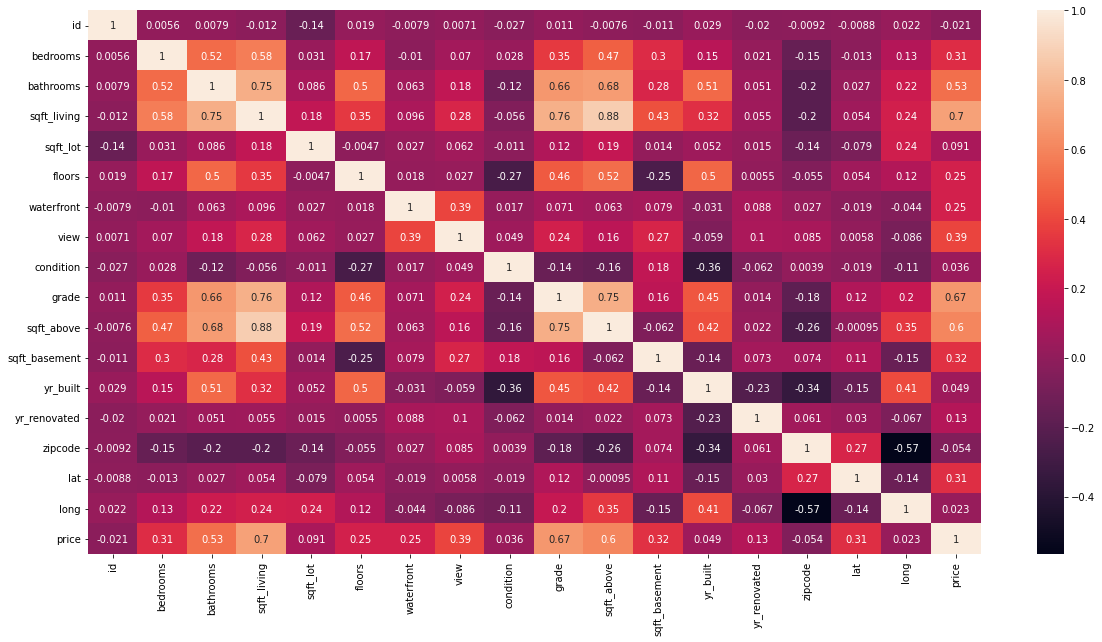

In [ ]:
corr_df = df.corr(method='pearson')

plt.figure(figsize=(20,10))
sns.heatmap(corr_df, annot=True)
plt.show()

#fonte de consulta: https://seaborn.pydata.org/generated/seaborn.heatmap.html


In [ ]:
df.drop(['id', 'date'], axis='columns', inplace=True)
#removi (dropei) as colunas  id e o data porque elas não traziam dados relevantes  

In [ ]:
# Instancia o MaxAbsScaler
p=MaxAbsScaler()
# Analisa os dados e prepara o padronizador
p.fit(df)
# Transforma os dados
p.transform(df)

array([[ 0.09090909,  0.21875   ,  0.14771784, ...,  0.99140601,
        -0.99700455,  0.04220779],
       [ 0.06060606,  0.125     ,  0.08298755, ...,  0.99527812,
        -0.9981309 ,  0.03337662],
       [ 0.09090909,  0.125     ,  0.08962656, ...,  0.99385067,
        -0.99849819,  0.02967532],
       ...,
       [ 0.09090909,  0.3125    ,  0.17593361, ...,  0.99797813,
        -0.99602511,  0.07467532],
       [ 0.03030303,  0.09375   ,  0.03153527, ...,  0.99379207,
        -0.99840025,  0.03181818],
       [ 0.12121212,  0.3125    ,  0.25975104, ...,  0.99175555,
        -0.99657196,  0.04090909]])

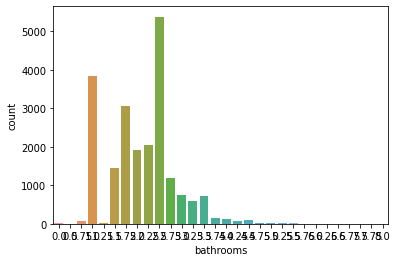

In [ ]:
sns.countplot(x="bathrooms", data=desafio03_df)

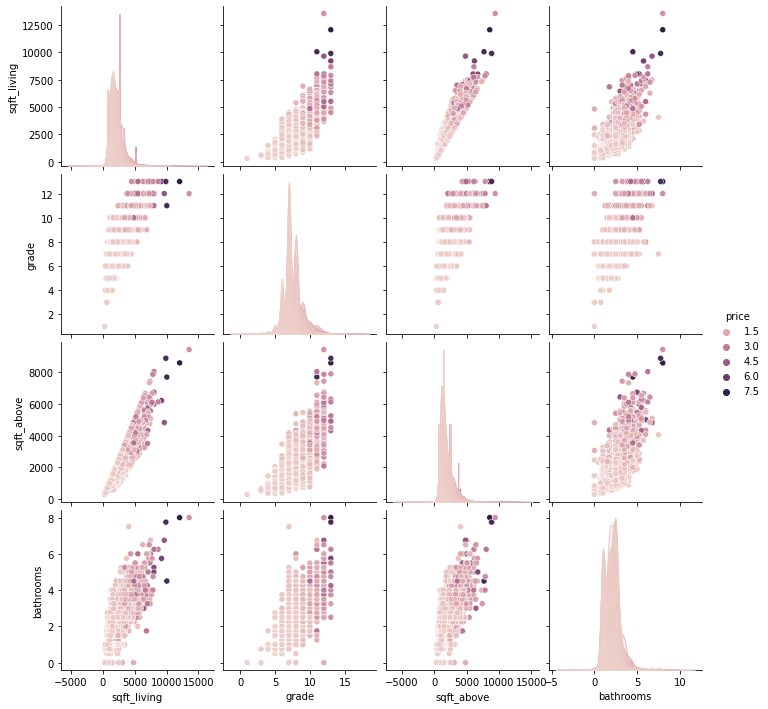

In [ ]:
sns.pairplot(desafio03_df[['sqft_living', 'grade', 'sqft_above', 'bathrooms', 'price']], hue = "price" );

<h1> Conclusão: </h1> 

Em um primeiro momento, as minhas atenções se concetram por horas no zipcode, o código postal americano que corresponde ao CEP no Brasil. Avaliava que a localização do imóvel traz como referência o valor por metro quadrado do imóvel. Portanto, cogitei categorizar os imóveis por bairro e assim estimar o valor do metro quadrado. Junto a isso, poderia ser complementado outras váriaveis afim de gerar um score que pudesse gerar (e exibir) o valor venal do imóvel.

Fiz várias simulações. Inclusive, contei muito com a ajuda e auxílio da colega Nara Guimaraes. Fizemos várias normalizações. Todas em vão! Isso porque o zipcode, sistema de endereçamento criado pela USPS (United States Postal Service) em 1963 com o intuito deotimizar o serviço postal dos Estados Unidos, é composto por 5 dígitos numéricos. Nenhuma outra variável do banco é tão extensa. Logo, tornou-se impossível patronizá-la com as demais variáveis do banco ao colocá-la no método 'pearson'.

Passada essa fase, concentrei as atenções para fazer a modelagem de dados a variavel sqft_living como determinante. Não consegui fazer grandes evoluções. 
Mas exercitei vários conhecimentos do curso. 
